### Download Dataset



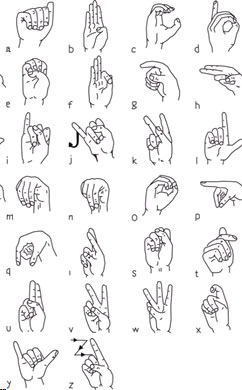


The  data set contains 87,000 images which are 200x200 pixels. There are 29 classes, of which 26 are for the letters A-Z and 3 classes for SPACE, DELETE and NOTHING. 

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle
from google.colab import files
files.upload()


     |████████████████████████████████| 58 kB 4.8 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=72d81dbc6ee0e83d8b4f6b3126f5e197002147b0b8e2c8c0d0e26278082b2859
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akumar5189","key":"42b31738db061eb699fd5e96045b3a26"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!rm -rf kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d nasrinsulthana/asl-dataset


 64% 25.0M/39.0M [00:00<00:00, 72.0MB/s]
100% 39.0M/39.0M [00:00<00:00, 89.9MB/s]


In [ ]:
#unzip dataset
!unzip /content/asl-dataset.zip -d  /content/dataset  
!rm -rf /content/asl-dataset.zip

Archive:  /content/asl-dataset.zip
  inflating: /content/dataset/A/10.png  
  inflating: /content/dataset/A/100.png  
  inflating: /content/dataset/A/101.png  
  inflating: /content/dataset/A/11.png  
  inflating: /content/dataset/A/12.png  
  inflating: /content/dataset/A/13.png  
  inflating: /content/dataset/A/14.png  
  inflating: /content/dataset/A/15.png  
  inflating: /content/dataset/A/16.png  
  inflating: /content/dataset/A/17.png  
  inflating: /content/dataset/A/18.png  
  inflating: /content/dataset/A/19.png  
  inflating: /content/dataset/A/2.png  
  inflating: /content/dataset/A/20.png  
  inflating: /content/dataset/A/21.png  
  inflating: /content/dataset/A/22.png  
  inflating: /content/dataset/A/23.png  
  inflating: /content/dataset/A/24.png  
  inflating: /content/dataset/A/25.png  
  inflating: /content/dataset/A/26.png  
  inflating: /content/dataset/A/27.png  
  inflating: /content/dataset/A/28.png  
  inflating: /content/dataset/A/29.png  
  inflating: /content

### Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from skimage.color import rgb2gray
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten,Dense
from tensorflow.keras.utils import plot_model

### read images

In [ ]:
dataset_path = '/content/dataset'

# dirs=next(os.walk(dataset_path))[1]
dirs = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O'
,'P','Q','R','S','T','U','V','W','X','Y','Z','del','nothing','space']
data = []
labels = []
for label,cls in enumerate(dirs):
  files = os.listdir(os.path.join(dataset_path,cls))
  for file in files[:100]:
    filename = os.path.join(dataset_path,cls,file)
    data.append([filename,cls])
    labels.append(label)

df = pd.DataFrame(data,columns=['filename','class'])
df

,filename,class
0,/content/dataset/A/92.png,A
1,/content/dataset/A/13.png,A
2,/content/dataset/A/74.png,A
3,/content/dataset/A/88.png,A
4,/content/dataset/A/21.png,A
...,...,...
2895,/content/dataset/space/70.png,space
2896,/content/dataset/space/115.png,space
2897,/content/dataset/space/40.png,space
2898,/content/dataset/space/14.png,space


In [ ]:
# labels = np.array(labels)
num_class = len(dirs)

In [ ]:
# labels = df['class'].unique()
# num_class = len(labels)
# le = LabelEncoder()
# label = le.fit_transform(list(df['class']))


In [ ]:
df['class'].unique()

array(['nothing', 'del', 'I', 'X', 'Q', 'O', 'H', 'space', 'C', 'V', 'Y',
       'D', 'M', 'K', 'B', 'T', 'S', 'P', 'Z', 'W', 'N', 'G', 'A', 'L',
       'E', 'R', 'F', 'U', 'J'], dtype=object)

In [ ]:
from skimage.transform import resize
from skimage import util
imgs = []
def read_images():
  for imagename in df['filename']:
    image = plt.imread(imagename)
    image = util.img_as_ubyte(resize(image,(200,200)))[:,:,0:3]
    yield image
  
for image in read_images():
    imgs.append(image)


imgs = np.array(imgs)
imgs = imgs/255

label = np.array(labels)
# imgs = np.expand_dims(imgs,axis=3)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(imgs,label,test_size=0.3,random_state=32,stratify=label)

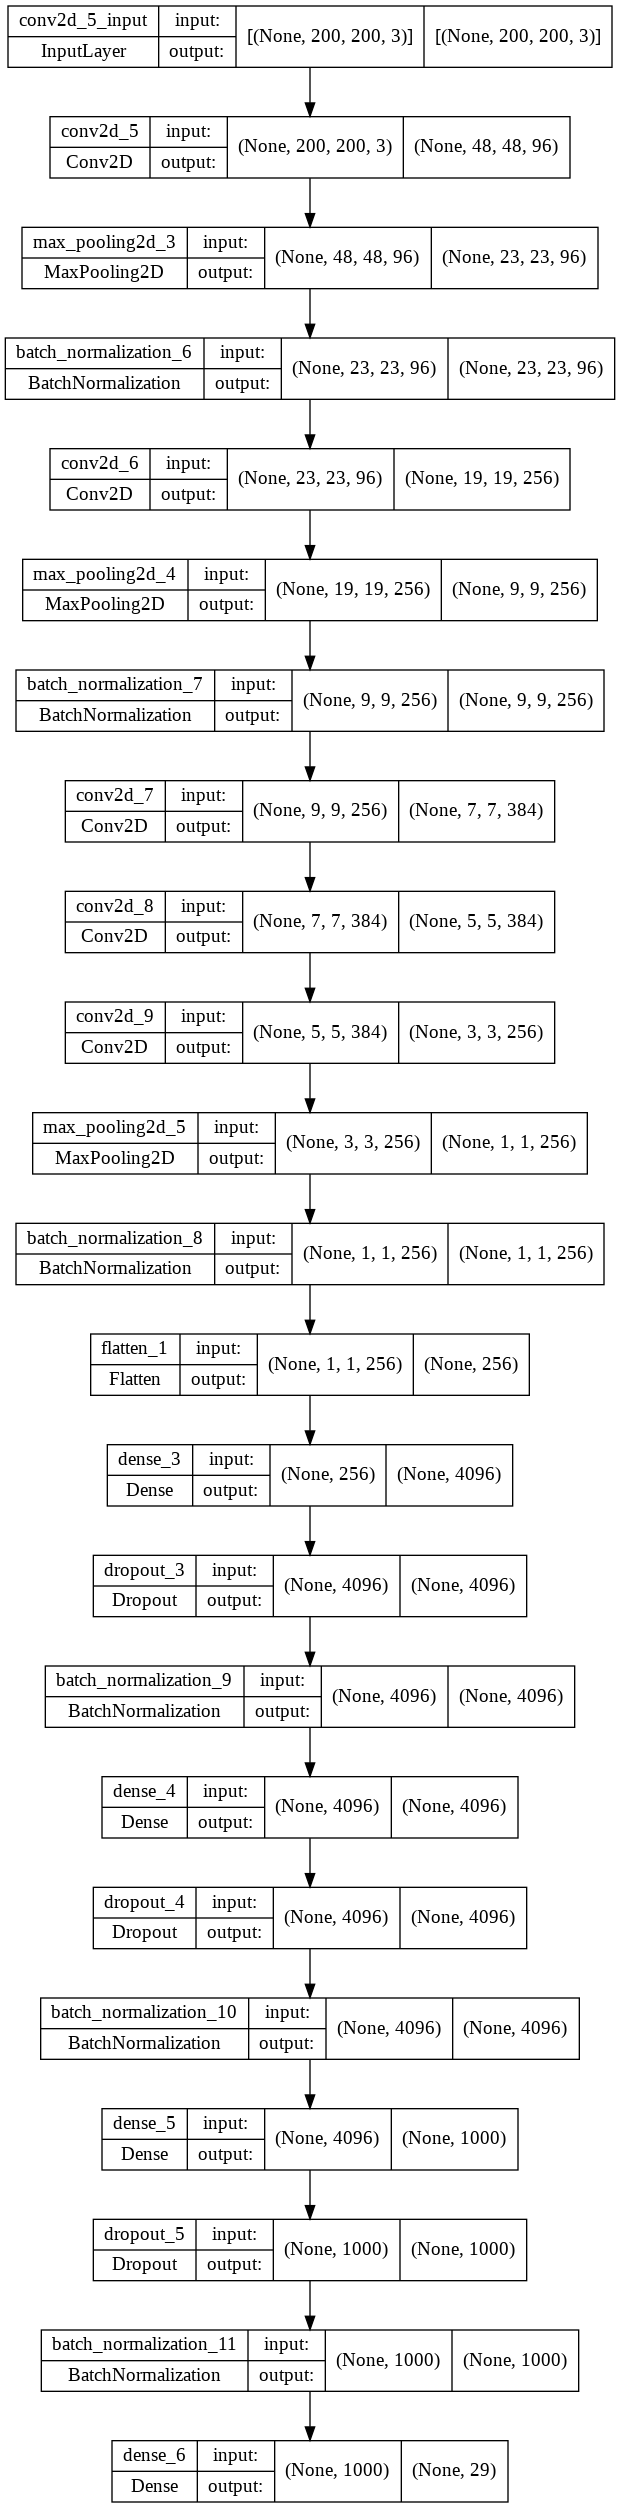

In [ ]:
# alexnet 


model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(200,200,3)))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#4 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#5 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#6 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#7 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#8 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#9 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#10 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#11 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(num_class,activation="softmax"))


plot_model(model,show_shapes=True)

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
his = model.fit(xtrain, ytrain,epochs=70)
save_dir = "."
model_name = 'model.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

Epoch 1/70
64/64 [==============================] - 17s 72ms/step - loss: 1.1693 - accuracy: 0.6606
Epoch 2/70
64/64 [==============================] - 4s 65ms/step - loss: 0.2751 - accuracy: 0.9089
Epoch 3/70
64/64 [==============================] - 4s 65ms/step - loss: 0.2760 - accuracy: 0.9123
Epoch 4/70
64/64 [==============================] - 4s 65ms/step - loss: 0.1211 - accuracy: 0.9635
Epoch 5/70
64/64 [==============================] - 4s 65ms/step - loss: 0.1617 - accuracy: 0.9542
Epoch 6/70
64/64 [==============================] - 4s 65ms/step - loss: 0.0933 - accuracy: 0.9709
Epoch 7/70
64/64 [==============================] - 4s 65ms/step - loss: 0.0752 - accuracy: 0.9773
Epoch 8/70
64/64 [==============================] - 4s 65ms/step - loss: 0.0710 - accuracy: 0.9739
Epoch 9/70
64/64 [==============================] - 4s 65ms/step - loss: 0.0566 - accuracy: 0.9823
Epoch 10/70
64/64 [==============================] - 4s 65ms/step - loss: 0.0395 - accuracy: 0.9872
Epoch 11

In [ ]:


loss_and_metrics = model.evaluate(xtest, ytest, verbose=0)
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.007784698158502579
Test Accuracy 0.9988505840301514


In [ ]:
from google.colab import files
files.download('model.h5')

In [ ]:
roi = plt.imread('/content/dataset/B/10.png')
roi = util.img_as_ubyte(resize(roi,(200,200)))[:,:,0:3]
roi = roi/255
img = roi.copy()
img = np.expand_dims(img,axis=0)
out = model.predict(img)
label = np.argmax(out[0])
label

1